# 0 minutes

## What are we here for?

What are we going to do in the coming hour? I am going to talk about QuTiP and show you QuTiP being used. Presumably most of you are here to learn about QuTiP, and so presumably you will do whatever is necessary for *you* to learn -- watch, listen, think, make notes, etc.

Two things are vital for learning -- engaging with the material at hand and feedback.

The engaging we have partly covered already, but it is worth emphasising. If you don't engage you won't learn. If you immerse yourself more deeply you will learn more. If you are not going to engage, go do something else. Don't waste your time if you're not going to engage. You are in charge of your own time and your own learning.

Now for feedback.

Inevitably during the learning process we will go astray. I will misexplain something, or explain something in a way that is not right for *you* as you are right now. You will misunderstand things, or fail to see that there is something to understand. None of these are things to be ashamed of -- they are just part of the process.

Effective learning requires detecting and correcting these glitches. In this lecture our primary means of feedback will be questions. Ask questions to check your understanding, and ask immediately if you do not understand something. If you don't understand something, it will make the next thing harder to follow, and you will quickly become lost.

An hour is short, so we will not get to learn very much in it -- only see a few things in one corner of QuTiP -- but if you learn often and regularly, the small pieces of learning add up, until one day someone will ask you in amazement "how did you know how to do that" and you will not be able to say exactly, except to answer "I kepted learning every day for a long time".

Onwards.

## QuTiP and open quantum systems

QuTiP is a Python package for simulating *open quantum systems*.

An open quantum system is a quantum *system* *interacting* within an *environment*, like so:

![Open Quantum System](images/open-qm-sys.png "Open Quantum System")

Reference: [doi:10.1063/1.5115323](https://doi.org/10.1063/1.5115323)

The system evolves according to a [Schrödinger equation](https://en.wikipedia.org/wiki/Schr%C3%B6dinger_equation) (1926):

$$
    i \hbar \frac{d \psi}{dt} = H(t) \psi
$$

where $\Psi \in \mathcal{H}$.

Or if the system is represented by a density matrix (i.e. an essemble) then by the [von Neumann equation](https://en.wikipedia.org/wiki/Density_matrix#The_von_Neumann_equation_for_time_evolution) (1927?):

$$
    \frac{\partial \rho}{\partial t} = \frac{1}{i \hbar} [H(t),\rho]
$$

where $ \rho $ is an operator $ \rho : \mathcal{H} \rightarrow \mathcal{H} $ where $ \rho = \sum_j p_j \lvert \psi_j \rangle \langle \psi_j \rvert $ and the $ p_j $ are real, positive (or zero) and sum to $ 1 $.

Practicalities:

* The system Hilbert space is tractably small (e.g. a few tens of qubits).
* The environment Hilbert space is intractably large (e.g. a small antenna and its surrounding electromagnetic field)
* The environment is coupled to the system via an interaction term, $ H_I $ in the total system Hamiltonian, $ H_T $.
* The total system evolves unitarily according to the Schrödinger or Von Neuman equation with $ H_T = H_S + H_I + H_E $.
* The environment and its effect on the system must be approximated in some way.

Approximating the effects of the environment:

* Typically the system plus environment is modelled by a new Hilbert space, $ \mathcal{H}_A $, and a new evolution equation for it.
* Both $ \mathcal{H}_A $ and the new evolution equation will dependent on the environment.
* In the simplest examples, $ \mathcal{H}_A $, will sometimes *look* exactly like $ H $. Do not be fooled.
* The new evolution equation will be non-unitary.

## Why do we care about open quantum systems?

The only quantum systems we care about are ones we can interact with -- i.e. the open ones!

Actually this is not entirely true. Often a quantum system will be well approximated by a classical model before we interact with it (e.g. a soccer ball) so in many cases a classical model will suffice.

And sometimes we will want a model for a quantum system by itself.

But when we want to interact with a quantum system -- i.e. to incorporate non-classical effects into our classical world -- we need models which are open quantum systems.

In particular, *controlling* a quantum system -- i.e. making it do stuff -- requires interacting with it, so controlled quantum systems are typically open ones.

Open quantum systems cover a LOT of interesting cases:

* Quantum computers!
* Measurement!
* Quantum thermodynamics!
* Classical computers!
* Biology! (e.g. photosynthesis)
* Quantum statistical mechanics
* Quantum sensors
* Quantum cosmology
* Gravitational wave detectors!

One can easily keep going. A lot of the basic theory of open quantum systems is established. There are some really hard problems still to tackle (measurement, non-Markovian interactions, large-scale and precision controllable devices) and applications everywhere.

## A [Fabry-Pérot interferometer](https://en.wikipedia.org/wiki/Fabry%E2%80%93P%C3%A9rot_interferometer) in a thermal bath

i.e. the very "simplest" example.

* The system (i.e. the interferometer) is represented by [quantum harmonic oscillator](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator) with frequency $ \omega_c $ and Hamiltonian $ H = \hbar \omega ( N + \frac{1}{2} ) $ and $ N = a^{\dagger} a $ (the number of the excitation).

* The bath may emit photons into the interferometer cavity, or absorb photons from it. This raises or lowers the number of excitations in cavity.

As the approximate Hilbert space $ H_A $ we will use $ H $ itself, but the evolution will be non-unitary and will be government by a Lindblad equation:

$$
    \frac{\partial \rho}{\partial t} = \frac{i}{\hbar}[H, \rho] + \sum_{i=1}^{2} \gamma_i \left( L_i^{\dagger} \rho L_i - \frac{1}{2} \left\{ L_{i}^{\dagger} L_i, \rho \right\} \right)
$$

where:

\begin{align}
    L_1 = a, & & \gamma_1 = \frac{\gamma}{2}(n + 1) \\
    L_2 = a^{\dagger}, & & \gamma_2 = \frac{\gamma}{2}n \\
\end{align}

$ L_1 $ represents the possibility of the system emitting a photon into the bath, and $ L_2 $ the possibility of the system absorbing a photon from the bath.

$ \gamma $ is the strength of the coupling between the bath and the system.

$ n $ is the average occupancy of the bath.

The evolution equation is an example of a [Lindblad equation](https://en.wikipedia.org/wiki/Lindbladian) (1976). These describe the evolution of systems coupled to Markovian baths (i.e. where the effect of the bath on the system depends only on the current state of the approximated system and not on the complete evolution history).

The operators $ L $ are called Lindblad or jump operators.

The terms $ L_i^{\dagger} \rho L_i - \frac{1}{2} \left\{ L_{i}^{\dagger} L_i, \rho \right\} $ may be represented by a superoperator called the Liouvillian.

The Lindblad equation and Liouvillians form the basis of many more complex approximations which capture richer interactions between a system and an environment, so they are well worth studying in detail. 

QuTiP includes direct support for solving Lindblad master equations via the master equation solver, `mesolve`.

# 15 minutes

## Simple two-level system (i.e. a qubit)

In [10]:
import qutip

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
q = qutip.ket("0")
q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [15]:
H =  1 / np.sqrt(2) * qutip.Qobj([
    [1, 1],
    [1, -1],
])
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

See https://en.wikipedia.org/wiki/Quantum_logic_gate for the matrices for more quantum gates.

In [17]:
H * q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

## Composing systems

In [19]:
qq = qutip.ket("00")
qq

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [22]:
H_gates = qutip.tensor(H, H)
H_gates

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]

In [23]:
H_gates * qq

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.5]
 [0.5]
 [0.5]
 [0.5]]

## Evolving a single qubit system over time

If the Hamiltonian is time-independent, it always represents a rotation around some axis. A simple example is:

$$
    H = \frac{1}{2} \delta \sigma_x + \frac{1}{2} \epsilon \sigma_z
$$

where $ \epsilon $ is the energy difference between the two states and $ \delta $ is the strenght of the tunneling between them. 

In [29]:
def H_q(epsilon, delta):
    """ Return a single qubit Hamiltonian with energy difference epsilon and tunneling strength delta. """
    return 0.5 * delta * qutip.sigmax() + 0.5 * epsilon * qutip.sigmaz()

In [53]:
H_q(1, 0) * qutip.ket("0")

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0. ]
 [0.5]]

In [54]:
H_q(1, 0) * qutip.ket("1")

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0. ]
 [-0.5]]

In [36]:
H_q(1, 0).eigenenergies()

array([-0.5,  0.5])

In [48]:
H_q(2, 0).eigenenergies()

array([-1.,  1.])

In [46]:
evals, evecs = H_q(1, 0).eigenstates()
for energy, state in zip(evals, evecs):
    print("Energy:", energy)
    print("State:", state)
    print()

Energy: -0.5
State: Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.]
 [-1.]]

Energy: 0.5
State: Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-1.]
 [ 0.]]



In [51]:
evals, evecs = H_q(0, 0.5).eigenstates()
for energy, state in zip(evals, evecs):
    print("Energy:", energy)
    print("State:", state)
    print()

Energy: -0.25
State: Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678]
 [ 0.70710678]]

Energy: 0.25
State: Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]



In [103]:
results = qutip.sesolve(
    H=H_q(1, 0.5),
    psi0=qutip.ket("0"),
    tlist=np.linspace(0, 10, 100),
    e_ops=[
        qutip.bra("0"),
        qutip.bra("1"),
    ],
    options=qutip.Options(store_states=True),
)

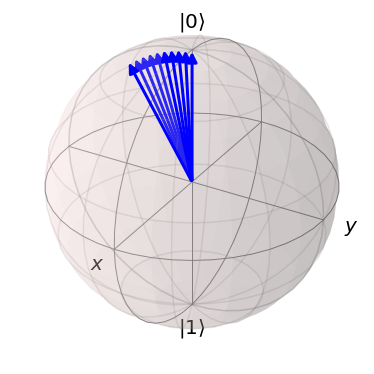

In [104]:
bloch = qutip.Bloch()
bloch.vector_color = ["b"]
bloch.add_states(results.states[:10])
bloch.show()

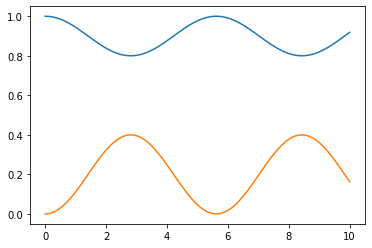

In [105]:
fig = plt.figure()
plt.plot(results.times, np.real(results.expect[0]))
plt.plot(results.times, np.real(results.expect[1]));

## With a small modification we can make the system Hamiltonian time-dependent

In [125]:
results = qutip.sesolve(
    H=[[H_q(1, 2), "cos(4 * t)"]],
    psi0=qutip.ket("0"),
    tlist=np.linspace(0, 2 * 2 * np.pi, 100),
    e_ops=[
        qutip.bra("0"),
        qutip.bra("1"),
    ],
    options=qutip.Options(store_states=True),
)

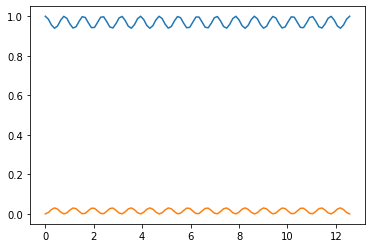

In [126]:
fig = plt.figure()
plt.plot(results.times, np.real(results.expect[0]))
plt.plot(results.times, np.real(results.expect[1]));

# 30 minutes

## Now for a completely different part of qutip -- i.e. qutip-qip

QuTiP's QIP (quantum information processing) package allows one to describe quantum circuits. Many software packages allow one to describe quantum circuits these days. What is special about QuTiP's version is that one can then run these circuits on simulated open quantum systems -- i.e. with physical hamiltonians, coupled to models of baths, with quantum noise and with quantum control.

Let's implement a very simple quantum algorithm ...

## The Deutsch–Jozsa algorithm

The Deutsch–Jozsa algorithm is the simplest quantum algorithm that offers an exponential speed-up compared to the classical one. It assumes that we have a function $ f : \{0,1\}^n \rightarrow \{0,1\} $
which is either balanced or constant.

Constant means that $ f(x) $ is either 1 or 0 for all inputs.

Balanced means that $ f(x) $ is 1 for half of the input domain and 0 for the other half.

A more rigorous definition can be found at https://en.wikipedia.org/wiki/Deutsch-Jozsa_algorithm.

The implementation of the Deutsch–Jozsa algorithm includes $ n $
input qubits and $ 1 $ ancilla initialised in state $ \lvert 1 \rangle.

At the end of the algorithm, the first $ n $ qubits are measured on the computational basis.

If the function is constant, the result will be $ 0 $ for all n qubits.

If it is balanced, $ \lvert 00...0 \rangle $ will never be measured.

The following example is implemented for the balanced two-qubit function $f(\psi)$ defined by:

$$
\begin{align}
  f(00) = 0 \\
  f(01) = 1 \\
  f(10) = 1 \\
  f(11) = 0
\end{align}
$$

This function is balanced, so the probability of measuring state $ \lvert 00 \rangle $ should be $ 0 $.

In [128]:
from qutip.qip.circuit import QubitCircuit

Note that QuTiP uses the name `SNOT` for the Hadamard gate that is more commonly named `H`.

In [129]:
qc = QubitCircuit(N=3)
qc.add_gate("X", targets=2)
qc.add_gate("SNOT", targets=0)
qc.add_gate("SNOT", targets=1)
qc.add_gate("SNOT", targets=2)

# function f(x)
qc.add_gate("CNOT", controls=0, targets=2)
qc.add_gate("CNOT", controls=1, targets=2)

qc.add_gate("SNOT", targets=0)
qc.add_gate("SNOT", targets=1)

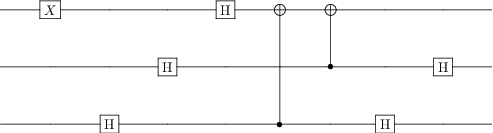

In [130]:
qc

# 45 minutes

## Simulating the circuit with the linear spin chain model

In [132]:
from qutip.qip.device import LinearSpinChain

In [133]:
processor = LinearSpinChain(3)
processor.load_circuit(qc);

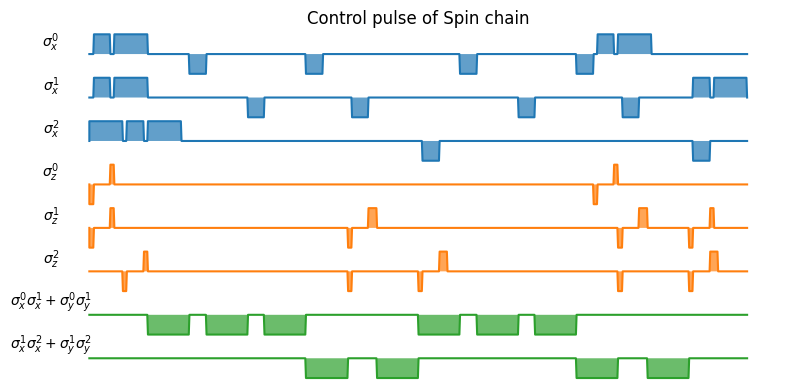

In [134]:
processor.plot_pulses(title="Control pulse of Spin chain", figsize=(8, 4), dpi=100);

In [138]:
# Without decoherence

basis00 = qutip.basis([2,2], [0,0])
psi0 = qutip.basis([2,2,2], [0,0,0])
result = processor.run_state(init_state=psi0)
print("Probability of measuring state 00:")
print(np.real((basis00.dag() * qutip.ptrace(result.states[-1], [0,1]) * basis00)[0,0]))

Probability of measuring state 00:
1.543502734240989e-08


In [139]:
# With decoherence

processor.t1 = 100
processor.t2 = 30
psi0 = qutip.basis([2,2,2], [0,0,0])
result = processor.run_state(init_state=psi0)
print("Probability of measuring state 00:")
print(np.real((basis00.dag() * qutip.ptrace(result.states[-1], [0,1]) * basis00)[0,0]))

Probability of measuring state 00:
0.13730658185148123


## Simulating the circuit with superconducting qubits

In [142]:
from qutip_qip.device import SCQubits

In [143]:
processor = SCQubits(num_qubits=3)
processor.load_circuit(qc);

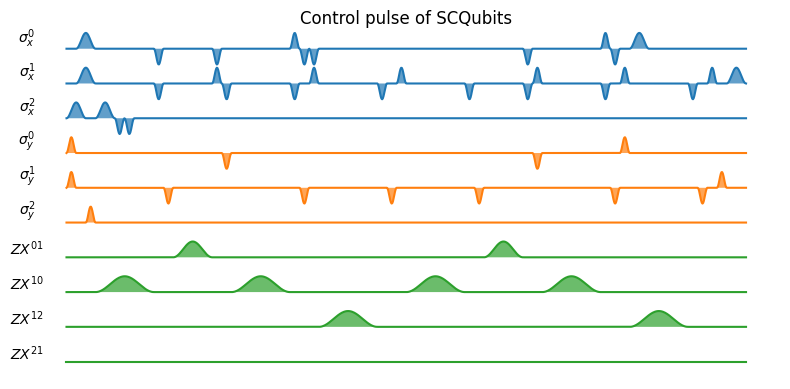

In [144]:
processor.plot_pulses(title="Control pulse of SCQubits", figsize=(8, 4), dpi=100);

In [145]:
# Without decoherence

basis00 = qutip.basis([3, 3], [0, 0])
psi0 = qutip.basis([3, 3, 3], [0, 0, 0])
result = processor.run_state(init_state=psi0)
print("Probability of measuring state 00:")
print(np.real((basis00.dag() * qutip.ptrace(result.states[-1], [0,1]) * basis00)[0,0]))

Probability of measuring state 00:
0.0003445928447621024


In [146]:
# With decoherence

processor.t1 = 50.e3
processor.t2 = 20.e3
psi0 = qutip.basis([3, 3, 3], [0, 0, 0])
result = processor.run_state(init_state=psi0)
print("Probability of measuring state 00:")
print(np.real((basis00.dag() * qutip.ptrace(result.states[-1], [0,1]) * basis00)[0,0]))

Probability of measuring state 00:
0.060418994841938065


See the "Quantum information processing" section on the [QuTiP tutorials](https://qutip.org/tutorials.html) page.

# End

In [2]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman and Simon Cross.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.0
Numpy Version:      1.22.3
Scipy Version:      1.8.0
Cython Version:     0.29.28
Matplotlib Version: 3.5.1
Python Version:     3.9.12
Number of CPUs:     8
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/simon/venvs/py3/qutip-venezuela-2022/lib/python3.9/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily gen